In [1]:
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

%matplotlib inline
mpl.rcParams["axes.unicode_minus"] = False
mpl.rcParams["font.family"] = "D2Coding"

In [2]:
client = bigquery.Client()
client.project

'adept-cycle-192204'

In [3]:
[i.dataset_id for i in client.list_datasets("bigquery-public-data")]

['austin_311',
 'austin_bikeshare',
 'austin_crime',
 'austin_incidents',
 'austin_waste',
 'baseball',
 'bitcoin_blockchain',
 'bls',
 'bls_qcew',
 'breathe',
 'catalonian_mobile_coverage',
 'catalonian_mobile_coverage_eu',
 'census_bureau_acs',
 'census_bureau_construction',
 'census_bureau_international',
 'census_bureau_usa',
 'census_utility',
 'cfpb_complaints',
 'chicago_crime',
 'chicago_taxi_trips',
 'cloud_storage_geo_index',
 'cms_codes',
 'cms_medicare',
 'cms_synthetic_patient_data_omop',
 'covid19_ecdc',
 'covid19_geotab_mobility_impact',
 'covid19_geotab_mobility_impact_eu',
 'covid19_google_mobility',
 'covid19_google_mobility_eu',
 'covid19_govt_response',
 'covid19_italy',
 'covid19_italy_eu',
 'covid19_jhu_csse',
 'covid19_jhu_csse_eu',
 'covid19_nyt',
 'covid19_open_data',
 'covid19_open_data_eu',
 'covid19_usafacts',
 'covid19_weathersource_com',
 'crypto_bitcoin',
 'crypto_bitcoin_cash',
 'crypto_dash',
 'crypto_dogecoin',
 'crypto_ethereum',
 'crypto_ethereum_cla

In [4]:
dataset = client.get_dataset(client.dataset("usa_names", project="bigquery-public-data"))
dataset

Dataset(DatasetReference('bigquery-public-data', 'usa_names'))

In [5]:
[i.table_id for i in client.list_tables(dataset)]

['usa_1910_2013', 'usa_1910_current']

In [6]:
table = client.get_table(dataset.table("usa_1910_2013"))
table

Table(TableReference(DatasetReference('bigquery-public-data', 'usa_names'), 'usa_1910_2013'))

In [7]:
print("table의 총 bytes는",format(table.num_bytes,","))
print("talbe의 총 data row수는",format(table.num_rows,","))

table의 총 bytes는 171,432,506
talbe의 총 data row수는 5,552,452


In [8]:
table.schema

[SchemaField('state', 'STRING', 'NULLABLE', '2-digit state code', ()),
 SchemaField('gender', 'STRING', 'NULLABLE', 'Sex (M=male or F=female)', ()),
 SchemaField('year', 'INTEGER', 'NULLABLE', '4-digit year of birth', ()),
 SchemaField('name', 'STRING', 'NULLABLE', 'Given name of a person at birth', ()),
 SchemaField('number', 'INTEGER', 'NULLABLE', 'Number of occurrences of the name', ())]

In [9]:
sql = "select * from `bigquery-public-data.usa_names.usa_1910_2013` t1 where t1.state = 'FL'"
df = client.query(sql).to_dataframe()

In [10]:
df.head()

,state,gender,year,name,number
0,FL,F,1910,Mary,239
1,FL,F,1910,Ruth,56
2,FL,F,1910,Beatrice,49
3,FL,F,1910,Anna,26
4,FL,F,1910,Clara,25


In [12]:
temp = df.groupby(["name","gender"])["number"].sum().reset_index()

In [13]:
temp.head()

,name,gender,number
0,Aaden,M,191
1,Aadyn,M,5
2,Aaiden,M,13
3,Aalayah,F,5
4,Aaleyah,F,22


In [14]:
#플로리다 주에서 각 성별 별로 가장 많이 지은 이름
temp[temp["number"].isin(list(temp.groupby("gender")["number"].max()))]

,name,gender,number
7442,Mary,F,66066
7650,Michael,M,138882


In [16]:
df.head()

,state,gender,year,name,number
0,FL,F,1910,Mary,239
1,FL,F,1910,Ruth,56
2,FL,F,1910,Beatrice,49
3,FL,F,1910,Anna,26
4,FL,F,1910,Clara,25


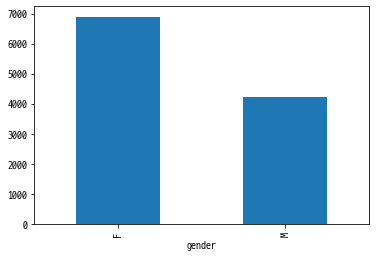

In [17]:
df[["gender","name"]].drop_duplicates().groupby("gender").size().plot(kind="bar")
#여성 이름이 더 다양함
plt.show()

In [32]:
df[["gender","year","name","number"]].groupby(["gender","year"])

,gender,year,name,number
0,F,1910,Mary,239
1,F,1910,Ruth,56
2,F,1910,Beatrice,49
3,F,1910,Anna,26
4,F,1910,Clara,25
...,...,...,...,...
183317,M,2013,Trae,5
183318,M,2013,Woodley,5
183319,M,2013,Xayden,5
183320,M,2013,Yovani,5
